In [2]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img_array = cv2.imread("/content/drive/MyDrive/FER2013/train/0/Training_3908.jpg")

In [6]:
img_array.shape

(48, 48, 3)

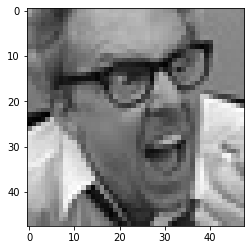

In [7]:
plt.imshow(img_array)

In [8]:
datadirectory = "/content/drive/MyDrive/FER2013/train/"

In [9]:
classes = ["0","1","2","3","4","5","6"]   ## LIST OF CLASSES

In [25]:
for category in classes:
  path = os.path.join(datadirectory , category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break  

NameError: ignored

In [24]:
img_size = 224    #CHANGED THE SIZE FROM 48 X 48 TO 224 X 224 WHICH IS ACCEPTED BY TRANSFER LEARNING MODEL 
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

NameError: ignored

In [12]:
new_array.shape

(224, 224, 3)

NOW READING ALL THE IMAGES AND CONVERTING THEM TO ARRAY

In [21]:
training_data = []
def create_training_data():
  for category in classes:
    path = os.path.join(datadirectory , category)
    class_num = classes.index(category)   #Labeling or indexing
    for img in os.listdir(path):
       try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size , img_size))
            training_data.append([new_array , class_num])
       except Exception as e:
          pass

In [23]:
create_training_data()

NameError: ignored

In [15]:
print(len(training_data))

11774


In [20]:
import random
random.shuffle(training_data)

NameError: ignored

In [17]:
x = []  # data / feature
y = [] #label / numbering

for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)  ## coverting x array to 4 Dimension array. because we are USING deep learning architecture such as mobileNet which takes 4D images 


In [18]:
x.shape


(11774, 224, 224, 3)

In [ ]:
## NORMALISE THE DATA
x = x/255.0

In [ ]:
Y= np.array(y)

#DEEP LEARNING MODEL FOR TRAINING - TRANSFER LEARNING

In [1]:
pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.8.0-py2.py3-none-any.whl (462 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = tf.keras.applications.MobileNetV2()     ##mobileNet is a pre-trained model

14548992/14536120 [==============================] - 0s 0us/step


In [4]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# TRANSFER LEARNING - TUNING , WEIGHTS WILL START FROM LAST CHECK POINT

In [5]:
base_input = model.layers[0].input    ##input layer

In [6]:
base_output = model.layers[-2].output

In [7]:
base_output   ##last row was deleted, coz they were unneccessary

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [17]:
final_output = layers.Dense(128)(base_output)   ## global pooling layer.
## adding new layer after the output of global pooling layer.
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)   ## Classification layer
    ## output layer

In [10]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [15]:
new_model = keras.Model(inputs = base_input , outputs = final_output)

In [16]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [19]:
new_model.fit(x,y,epochs = 25)    ##TRAINING

NameError: ignored

In [26]:
new_model.save('final_model_95p07.h5')

In [27]:
new_model = tf.keras.models.load_model('final_model_95p07.h5')

In [ ]:
D